#Support Vector Machines (SVM) for Classification

#✅ Objective:
Understand and implement SVM classifiers using linear, polynomial, and RBF kernels, compare performance, and visualize decision boundaries using synthetic datasets.

#📁 Step 1: Import Required Libraries

In [60]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#🧬 Step 2: Generate Synthetic Dataset

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


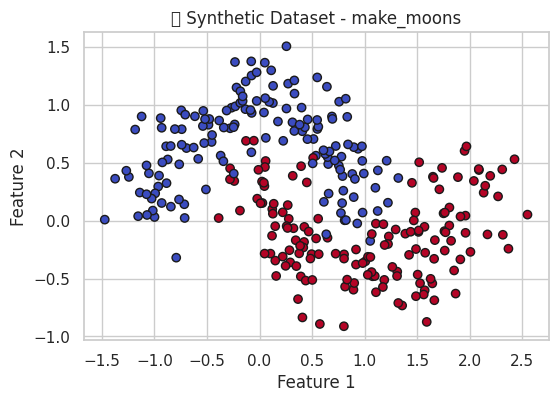

In [61]:
# Generate a synthetic non-linear dataset (for RBF and polynomial)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("🧪 Synthetic Dataset - make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#🛠️ Step 3: Define Function to Plot Decision Boundaries


In [62]:
# Utility function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



#🤖 Step 4: Train SVM Models with Different Kernels



🔍 Training with Linear Kernel
Accuracy: 0.92
Confusion Matrix:
 [[28  5]
 [ 1 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.89      0.98      0.93        42

    accuracy                           0.92        75
   macro avg       0.93      0.91      0.92        75
weighted avg       0.92      0.92      0.92        75



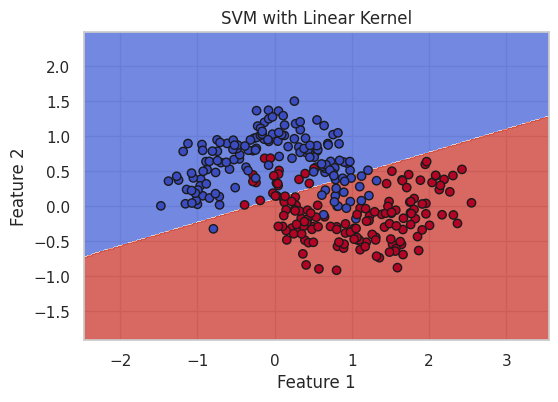


🔍 Training with Polynomial Kernel (degree=3)
Accuracy: 0.8933333333333333
Confusion Matrix:
 [[27  6]
 [ 2 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.87      0.95      0.91        42

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



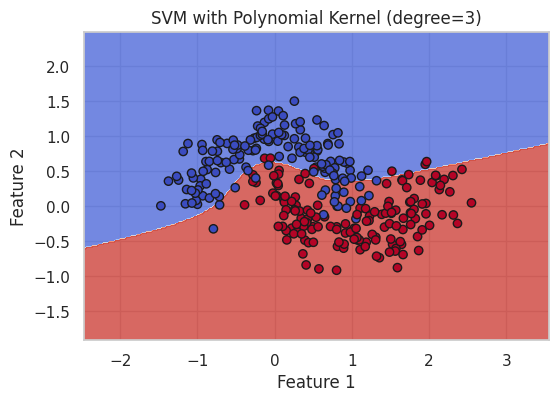


🔍 Training with RBF Kernel
Accuracy: 0.9866666666666667
Confusion Matrix:
 [[32  1]
 [ 0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.98      1.00      0.99        42

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



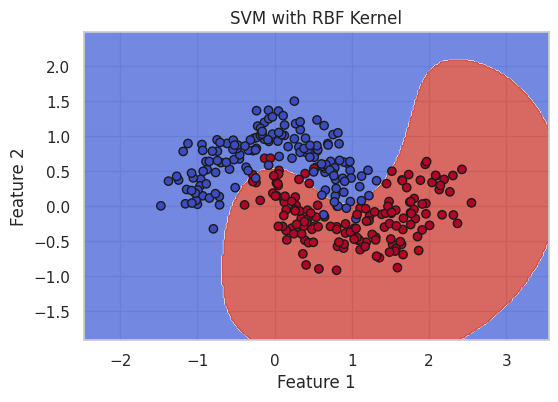

In [63]:
# Dictionary to store models and their kernel types
kernels = {
    'Linear Kernel': 'linear',
    'Polynomial Kernel (degree=3)': 'poly',
    'RBF Kernel': 'rbf'
}

models = {}

# Train and evaluate each SVM
for name, kernel in kernels.items():
    print(f"\n🔍 Training with {name}")
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1.0)
    else:
        model = SVC(kernel=kernel, C=1.0)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store model
    models[name] = model

    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Visualize
    plot_decision_boundary(model, X, y, f"SVM with {name}")


#📈 Step 5: Cross-Validation Comparison

In [64]:
# Compare kernel performance with 5-fold CV
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"🔁 {name}: Mean CV Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


🔁 Linear Kernel: Mean CV Accuracy = 0.8633 ± 0.0323
🔁 Polynomial Kernel (degree=3): Mean CV Accuracy = 0.9067 ± 0.0309
🔁 RBF Kernel: Mean CV Accuracy = 0.9467 ± 0.0194


#🧠 Summary

Linear kernel works well when data is linearly separable.

Polynomial kernel maps to higher dimensions but may overfit.

RBF kernel handles non-linear separation smoothly and is often a good default.

Use cross-validation to validate your choice of kernel and parameters.



#🧪 Optional Bonus: Test on Circular Data

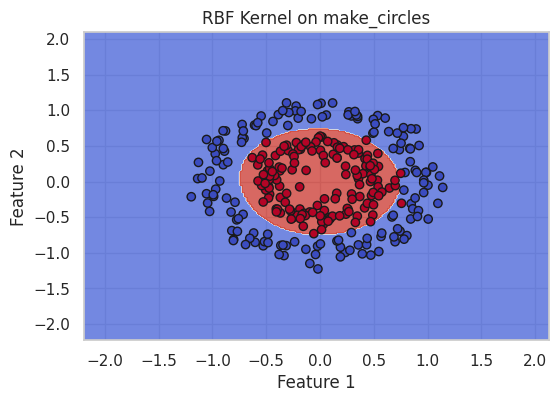

In [65]:
# Use make_circles to test RBF further
X_circle, y_circle = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

model_rbf = SVC(kernel='rbf', C=1.0)
model_rbf.fit(X_circle, y_circle)
plot_decision_boundary(model_rbf, X_circle, y_circle, "RBF Kernel on make_circles")
